# 회귀 모델
- 실제 키-몸무게 데이터를 사용하여 회귀 예측 모델을 만들어 본다
- 남여 성별 정보를 사용하여 성능의 개선되는 것을 확인한다

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [92]:
from google.colab import drive
drive.mount('content/drive/')

ValueError: ignored

In [95]:
!ls

contentdriveMyDriveAI_bootcamp	sample_data


## 데이터 다운로드
- 남여 키, 몸무게 데이터

In [18]:
data = pd.read_csv("https://github.com/data-labs/data/raw/main/weight-height.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Gender  10000 non-null  object 
 1   Height  10000 non-null  float64
 2   Weight  10000 non-null  float64
dtypes: float64(2), object(1)
memory usage: 234.5+ KB


In [19]:
print(data.shape)
data[:5]

(10000, 3)


,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [20]:
data.Gender.value_counts()

Female    5000
Male      5000
Name: Gender, dtype: int64

In [21]:
# 단위 변환 (인치, 파운드 --> cm, kg)
data.Height = data.Height*2.54 # cm
data.Weight = data.Weight*0.453592 # kg
data[:5]

,Gender,Height,Weight
0,Male,187.571423,109.720985
1,Male,174.706036,73.622732
2,Male,188.239668,96.497550
3,Male,182.196685,99.809504
4,Male,177.499761,93.598619


In [22]:
# Gender 컬럼의 값 확인
data.Gender.unique()

array(['Male', 'Female'], dtype=object)

In [23]:
sex = data.Gender.map({'Male':0, 'Female':1})
# 다른 방법 sex = df.Gender.apply(lambda x: 0 if x=="Male" else 1)
data.Gender = sex
data[:3]

,Gender,Height,Weight
0,0,187.571423,109.720985
1,0,174.706036,73.622732
2,0,188.239668,96.497550


In [24]:
# 사본 사용 (원본 백업)
df = data.copy()
df[:3]

,Gender,Height,Weight
0,0,187.571423,109.720985
1,0,174.706036,73.622732
2,0,188.239668,96.497550


## 데이터 특성

In [27]:
x = df.Height.values
y = df.Weight.values
z = df.Gender.values

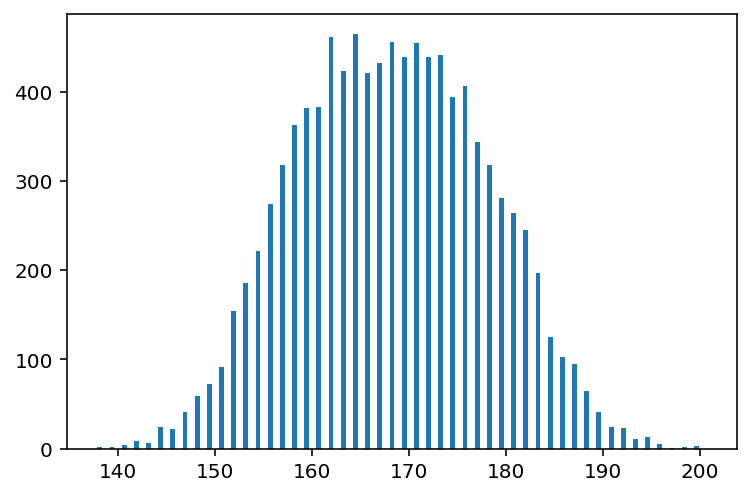

In [28]:
plt.hist(x, bins=50, width=0.5)
plt.show()

In [29]:
x.max()

200.65680555982956

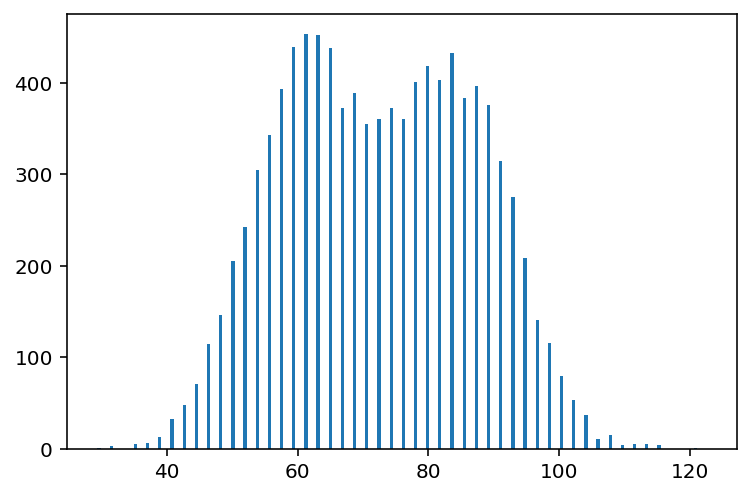

In [30]:
plt.hist(y, bins=50, width=0.5)
plt.show()

In [36]:
df.Gender.value_counts()

1    5000
0    5000
Name: Gender, dtype: int64

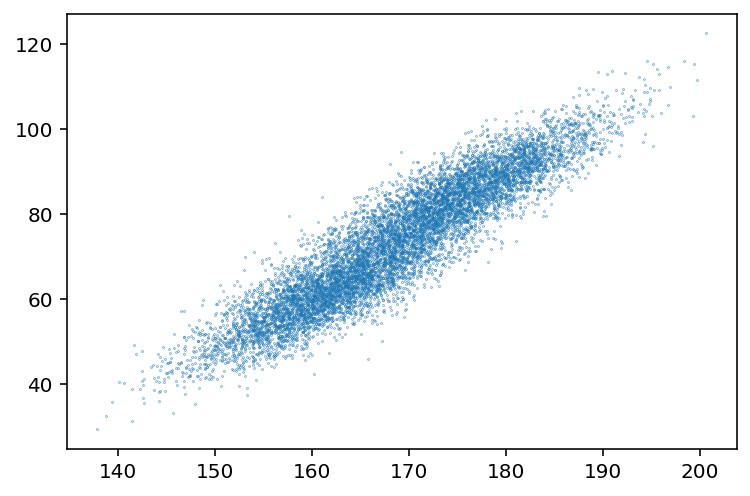

In [11]:
plt.scatter(x,y, s=0.05)

# 몸무게, 키, 성별로부터 BMI 예측
- BMI = Weight / ((Height/100)^2)
- LinearRegression 모델 
  : score 0.9803
  

In [38]:
X = df
y = df["Weight"] / (df['Height']/100) ** 2

In [49]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [50]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(7500, 3) (2500, 3) (7500,) (2500,)


In [51]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.9803782159827125

In [53]:
a, b = model.coef_ , model.intercept_
a,b

(array([ 0.03211022, -0.30451652,  0.35609945]), 50.712390168407765)

In [56]:
y_pred = model.predict(X_test)
y_pred, y_test

(array([27.35494217, 25.87485362, 24.08397435, ..., 24.83083111,
        29.22090512, 25.29148573]), 1400    27.405531
 6265    26.169970
 9067    24.273519
 683     29.930587
 3572    26.363460
           ...    
 3627    26.192917
 9827    22.374660
 3908    25.109643
 1245    28.786788
 9933    25.547374
 Length: 2500, dtype: float64)

In [57]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
mean_absolute_error(y_pred, y_test), mean_squared_error(y_pred, y_test)

(0.27804279918645386, 0.1404235701914184)

In [58]:
error = np.abs(y_test - y_pred)
error.max()

3.1787305172873648

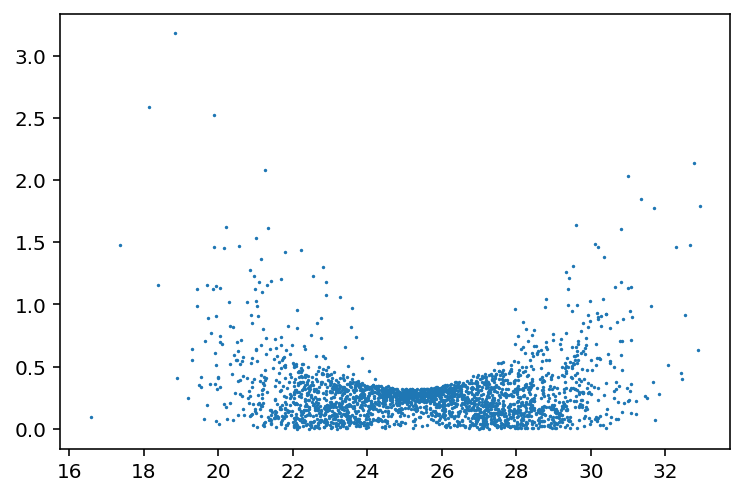

In [59]:
plt.scatter(y_pred, error, s=0.5)

- Polynomial Feature 추가
 : score 0.9996

In [65]:
from sklearn.preprocessing import PolynomialFeatures

p_features = PolynomialFeatures(degree=2, include_bias=True)
X_poly_train = p_features.fit_transform(X_train)
np.shape(X_poly_train)

(7500, 10)

In [66]:
X_poly_test = p_features.transform(X_test)
np.shape(X_poly_test)

(2500, 10)

In [71]:
model2 = LinearRegression()
model2.fit(X_poly_train, y_train)
model2.score(X_poly_test, y_test)

0.9996802167261928

In [73]:
a, b = model2.coef_, model2.intercept_
a, b

(array([ 0.00000000e+00,  6.28879635e-03, -9.17085447e-01,  1.07695794e+00,
         6.28879635e-03,  5.66355585e-06,  5.49511994e-04,  2.76424443e-03,
        -4.32744159e-03,  5.32327374e-05]), 76.06106171521505)

In [76]:
p_features.get_feature_names()

['1', 'x0', 'x1', 'x2', 'x0^2', 'x0 x1', 'x0 x2', 'x1^2', 'x1 x2', 'x2^2']

In [80]:
y_pred2 = model.predict(X_poly_test)
mean_absolute_error(y_pred2, y_test), mean_squared_error(y_pred2, y_test)

(0.030985430583265042, 0.0022885334460887603)

In [84]:
error2 =np.abs(y_pred2- y_test)
np.shape(y_pred2), np.shape(y_test)
error2.max()


0.6381314418190787

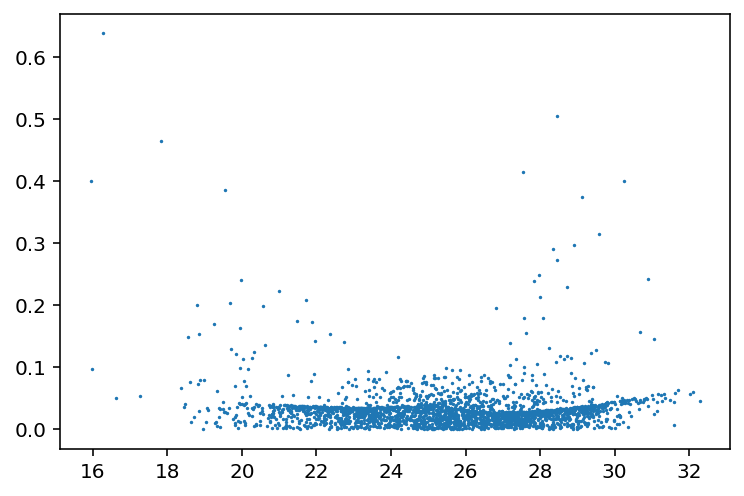

In [86]:
plt.scatter(y_pred2, error2, s=0.5)